## Final Project Submission

* Student name: Solphine Joseph, Grace Rotich, Mathew Kiprotich, Hilary Simiyu, Clyde Ochieng, Derrick Kiptoo. 
* Student pace:  full time
* Scheduled project review date/time: 
* Instructor name: Nikita 
* Blog post URL:


# Kings County Housing Analysis with Multiple Linear Regression

## a) Business Understanding

### Overview

A estate agency operating in Kingsway is committed to enhancing its services through data-driven decision-making. Their objective is to identify and understand the key factors influencing house prices in the region. By leveraging analytical methods rather than relying solely on intuition or sentiment, the agency aims to make informed improvements to its operations.

This project employs multilinear regression analysis to dissect the intricate relationship between various property features and their corresponding prices. This statistical technique allows for the exploration of how factors such as location, size, amenities, and condition influence housing prices. Through this approach, the agency seeks to gain deeper insights into the dynamics of the local real estate market and identify opportunities for optimization.

By undertaking this analytical endeavor, the real estate agency undertakes to refine its strategies, improve its services, and ultimately, better meet the needs of its clients. Through a systematic examination of the data, the agency aims to uncover actionable insights that will guide its decision-making processes and drive positive outcomes in the Kingsway housing market.

### Business Problem

In the face of market fluctuations and heightened competition within the real estate sector, our agency is grappling with pricing volatility, which poses significant challenges for our agents in devising effective business strategies. We seek strategic guidance to optimize our purchasing and selling endeavors, prioritizing informed decision-making to identify key areas of focus that promise maximum returns on investment.

### Objectives
* To determine the key factors influencing house prices.
* To develop multilinear regression models to predict house prices based on relevant features.
* To use insights from the regression analysis to optimize pricing strategies for both purchasing and selling properties.


### Hypothesis
* Null Hypothesis - There is no relationship between our independent variables and our dependent variable 

* Alternative Hypothesis - There is a relationship between our independent variables and our dependent variable

## b) Data Understanding

In this project, we utilized the King County House Sales dataset, which serves as the foundational dataset for our analysis. It was sourced Kaggle.The dataset encompasses comprehensive information regarding house sales within King County, Washington, USA. It comprises a diverse array of features, including the number of bedrooms, bathrooms, square footage, as well as geographical and pricing details of the properties sold. This dataset is frequently employed in data science and machine learning endeavors, particularly for predictive modeling tasks such as regression analysis aimed at forecasting house prices based on the provided features.

##### King County Housing Data Columns 

The column names contained in column_names.md are:
* `id`: A unique identifier for each house sale.
* `date`: The date when the house was sold.
* `price`: The sale price of the house, serving as the target variable for predictive modeling.
* `bedrooms`, `bathrooms`, `sqft_living`, `sqft_lot`: Numerical features representing the number of bedrooms and bathrooms, as well as the living area and lot area of the house, respectively.
* `floors`: The number of floors in the house.
* `waterfront`, `view`, `condition`, `grade`: Categorical features describing aspects such as waterfront availability, property view, condition, and overall grade assigned to the housing unit.
* `yr_built`, `yr_renovated`: Year of construction and renovation of the house.
* `zipcode`, `lat`, `long`: Geographical features including ZIP code, latitude, and longitude coordinates.
* `sqft_above`, `sqft_basement`, `sqft_living15`, `sqft_lot15`: Additional numerical features providing details about the house's above-ground and basement square footage, as well as living area and lot area of the nearest 15 neighboring houses.



#### Import Necessary Libraries



In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

In [60]:
# Creating a function that loads data and return it in a dataframe
def load_data(file_path):
    data = pd.read_csv(file_path)

    #shape
    data_shape = data.shape
    print(f"The dataset contains {data_shape[0]} houses with {data_shape[1]} features")
    print()
    
    #Data Types
    data_types = data.dtypes
    print("Columns and their data types:")
    for column, dtype in data_types.items():
        print(f"{column}: {dtype}")
    print()

    return data


In [61]:
load_data('data/kc_house_data.csv') 

The dataset contains 21597 houses with 21 features

Columns and their data types:
id: int64
date: object
price: float64
bedrooms: int64
bathrooms: float64
sqft_living: int64
sqft_lot: int64
floors: float64
waterfront: object
view: object
condition: object
grade: object
sqft_above: int64
sqft_basement: object
yr_built: int64
yr_renovated: float64
zipcode: int64
lat: float64
long: float64
sqft_living15: int64
sqft_lot15: int64



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


The dataset contains 21 columns, each representing a distinct feature, and 21,597 rows, with each row corresponding to a specific house sale entry.

The dataset contains a mix of data types, including integers (int64), floating-point numbers (float64), and objects (strings).  For instance, numerical features such as bedrooms, bathrooms, and sqft_living are represented as integers or floating-point numbers to facilitate mathematical computations, while categorical features like waterfront and view are stored as objects to accommodate text-based categories.

In [62]:
# calling our load data function and store the output in a variable called 'kings_county_data'
kings_county_data = load_data('data/kc_house_data.csv')

The dataset contains 21597 houses with 21 features

Columns and their data types:
id: int64
date: object
price: float64
bedrooms: int64
bathrooms: float64
sqft_living: int64
sqft_lot: int64
floors: float64
waterfront: object
view: object
condition: object
grade: object
sqft_above: int64
sqft_basement: object
yr_built: int64
yr_renovated: float64
zipcode: int64
lat: float64
long: float64
sqft_living15: int64
sqft_lot15: int64



In [63]:
#create a function that takes in a column and returns the column statistics as a dictionary
def descriptive_analytics(column):
    stats_dict = column.describe().to_dict()
    
    print("Descriptive Statistics for Column '{}':".format(column.name))
    print("The count of the column is:", stats_dict['count'])
    print("The mean of the column is:", stats_dict['mean'])
    print("The standard deviation of the column is:", stats_dict['std'])
    print("The minimum value of the column is:", stats_dict['min'])
    print("The 25th percentile of the column is:", stats_dict['25%'])
    print("The median of the column is:", stats_dict['50%'])
    print("The 75th percentile of the column is:", stats_dict['75%'])
    print("The maximum value of the column is:", stats_dict['max'])

In [64]:
descriptive_analytics(kings_county_data['price'])

Descriptive Statistics for Column 'price':
The count of the column is: 21597.0
The mean of the column is: 540296.5735055795
The standard deviation of the column is: 367368.1401013945
The minimum value of the column is: 78000.0
The 25th percentile of the column is: 322000.0
The median of the column is: 450000.0
The 75th percentile of the column is: 645000.0
The maximum value of the column is: 7700000.0


We can see that the maximum price of a house is 7700000 dollars  and the minimum price is 78000 dollars

There are 21597 prices regarding to the houses in the dataset

Average price of a house is 540296.57 dollars

## c) Data Preparation



In [65]:
kings_county_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [66]:
#Create a function that identifys missing values and duplicates and returns the output as values in a dictionary
def identify_issues(dataset):
    # Identify missing values as a percentage of the whole dataset
    missing_values = (dataset.isnull().sum())/len(dataset) * 100

    # Identify duplicates
    duplicates = dataset.duplicated().sum()
    
    #return a dictionary 
    return {'duplicates': duplicates,
            'missing values': missing_values.round(2)}   


In [67]:
identify_issues(kings_county_data)

{'duplicates': 0,
 'missing values': id                0.00
 date              0.00
 price             0.00
 bedrooms          0.00
 bathrooms         0.00
 sqft_living       0.00
 sqft_lot          0.00
 floors            0.00
 waterfront       11.00
 view              0.29
 condition         0.00
 grade             0.00
 sqft_above        0.00
 sqft_basement     0.00
 yr_built          0.00
 yr_renovated     17.79
 zipcode           0.00
 lat               0.00
 long              0.00
 sqft_living15     0.00
 sqft_lot15        0.00
 dtype: float64}

The examination indicates that there are no duplicate entries within the dataset, ensuring the integrity of the records. However, attention is warranted to address missing values present in certain columns. Specifically, the 'waterfront' feature exhibits 11% of null values, representing a negligible portion of the dataset. Similarly, the 'yr_renovated' feature shows a relatively higher percentage of missing values, accounting for approximately 17.79% of the dataset

##### Before making changes we make a copy of the dataframe instead of overwriting data

In [68]:
house_data_clean = kings_county_data.copy()

In [69]:
# Changing the date to date time
house_data_clean['date'] = pd.to_datetime(house_data_clean['date'])

# Extracting only the year from the column Date
house_data_clean.date = house_data_clean['date'].dt.year

# Changing the dates for the year built 
house_data_clean['yr_built'] = pd.to_datetime(house_data_clean['yr_built'],format='%Y').dt.year


The above code converts the 'date' column data to only contain the year the house was sold, for the purpose of analysis we will use only the year since the changes month by month will be minor.

#### Dealing with the missing values

In [70]:
# creating a function that deals with missing values in our dataset
def missing_values(dataset):
    # drop the rows from views
    dataset.dropna(subset=['view'],inplace=True)

    # Filling the NaN values for waterfront with NO
    dataset.waterfront.fillna('NO',inplace=True)
    
    # Dropping the yr_renovated column 
    dataset.drop('yr_renovated',axis=1,inplace=True)

'yr_renovated' has the highest percentage of NaN values 17%. This will be dropped since it will not be used within our model inline with the business problem.

'Waterfront' feature has 11% null values, this was filled with NO on the assumption that these cells were not filled since they lacked waterfronts

For the 'View' column, the null values were dropped by row since the overall percentage impact would be minimal

In [71]:
# call the function and pass our data frame as a parameter
missing_values(house_data_clean)

In [72]:
identify_issues(house_data_clean)

{'duplicates': 2,
 'missing values': id               0.0
 date             0.0
 price            0.0
 bedrooms         0.0
 bathrooms        0.0
 sqft_living      0.0
 sqft_lot         0.0
 floors           0.0
 waterfront       0.0
 view             0.0
 condition        0.0
 grade            0.0
 sqft_above       0.0
 sqft_basement    0.0
 yr_built         0.0
 zipcode          0.0
 lat              0.0
 long             0.0
 sqft_living15    0.0
 sqft_lot15       0.0
 dtype: float64}

After performing the clean we see there are two duplicates created we will go ahead and investigate on that

In [73]:
house_data_clean[house_data_clean.duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
3947,1825069031,2014,550000.0,4,1.75,2410,8447,2.0,NO,GOOD,Good,8 Good,2060,350.0,1936,98074,47.6499,-122.088,2520,14789
20038,8648900110,2014,555000.0,3,2.50,1940,3211,2.0,NO,NONE,Average,8 Good,1940,0.0,2009,98027,47.5644,-122.093,1880,3078


* These are not true duplicates since some data in various columns differ from one another

## d) Exploratory Data Analysis

### King County Housing Analysis and Visualization

In the exploratory phase of data analysis, univariate and bivariate analysis was carried out.

For the univariate analysis we focused on the categorical columns whereas bivariate numerical columns

#### Analysis for numerical columns

This code snippet categorizes columns with numeric values from the DataFrame house_data_clean and prints them out

In [74]:
# Initialize lists for numeric columns
numeric_columns = []

# Iterate through columns and categorize them based on data type
for column in house_data_clean.columns:
        if house_data_clean[column].dtype in ['int64', 'float64']:  # Check if the column data type is numeric
            numeric_columns.append(column)
    
            
print ("These are columns with numerical values:\n",numeric_columns)


These are columns with numerical values:
 ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


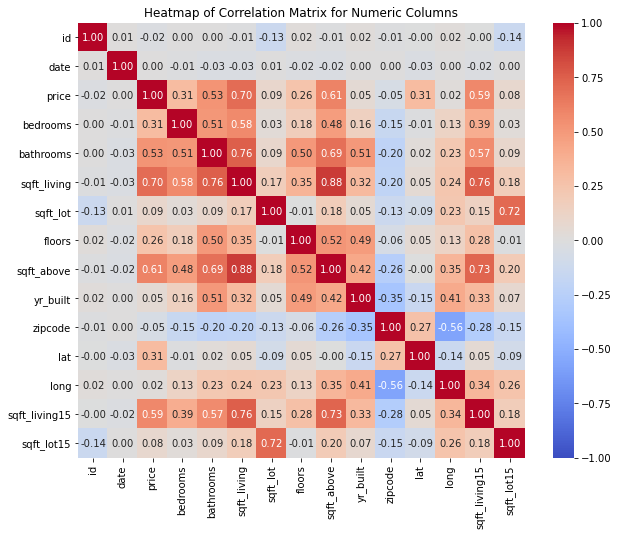

In [75]:
#This code snippet calculates the correlation matrix for numeric columns in the kings_data DataFrame and visualizes it using a heatmap.
numeric_columns = house_data_clean.select_dtypes(include=['int64', 'float64'])
# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()
    
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix for Numeric Columns')
plt.show()

Price is our target variable and by the heat map we can deduce:

* sqft_living has a high positive correlation of about 0.76 
* bathrooms, sqft_above and sqft_living15 moderate positive corelation ranging between 0.5 and 0.7
* the rest have a weak positive and negative correlation


In [76]:
# We will now drop the columns with a weak correlation to price
house_data_clean.drop(columns=['date', 'sqft_lot', 'condition', 'zipcode', 'long', 'sqft_lot15', 'yr_built', 'lat'], inplace=True)

#### Analysis for categorical columns

This code snippet visualizes the relationship between the 'waterfront' feature and the average sale price. A bar plot is used to show the average price for properties with and without waterfront.

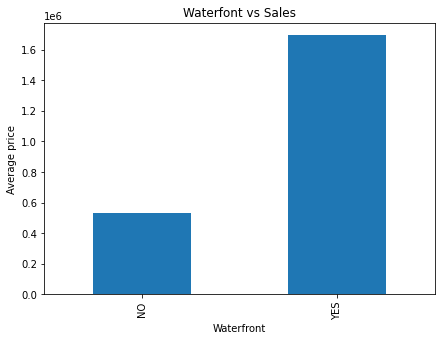

In [77]:
Categorical = ['waterfront', 'grade'] 

# How waterfront relates to saleprice
# plot the barplot
plt.figure(figsize = (7,5))
house_data_clean.groupby('waterfront')['price'].mean().plot.bar()

# set the axes and title
plt.xlabel('Waterfront')
plt.ylabel('Average price')
plt.title('Waterfont vs Sales')

# display the plot
plt.show()

The plot above clearly shows that houses with waterfronts are the most popular and sells the most

This code snippet visualizes the relationship between the 'condition' feature and the average sale price. A bar plot is used to show the average price for properties with different conditions.

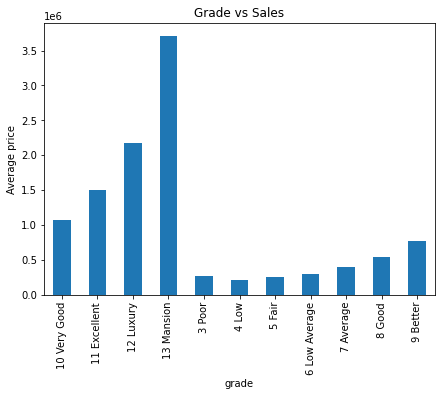

In [78]:
# How grade relates to saleprice
# plot the barplot
plt.figure(figsize = (7,5))
house_data_clean.groupby('grade')['price'].mean().plot.bar()

# set the axes and title
plt.xlabel('grade')
plt.ylabel('Average price')
plt.title('Grade vs Sales')

# display the plot
plt.show()

compairing mansions with the others u can tell its the highest selling

<Figure size 720x288 with 0 Axes>

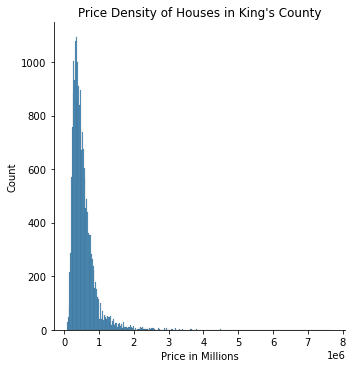

In [81]:
# Plotting a histogram with kernel density estimate (KDE) of the "price" variable
plt.figure(figsize=(10,4))
price_dist = sns.displot(house_data_clean["price"])
price_dist.set(xlabel="Price in Millions", title="Price Density of Houses in King's County");
plt.savefig('Visualization2')  # Save the plot as an image file

The observation reveals that the distribution of house is right-skewed.we look at house prices, we notice that most houses are not very expensive, but there are a few that are very pricey.

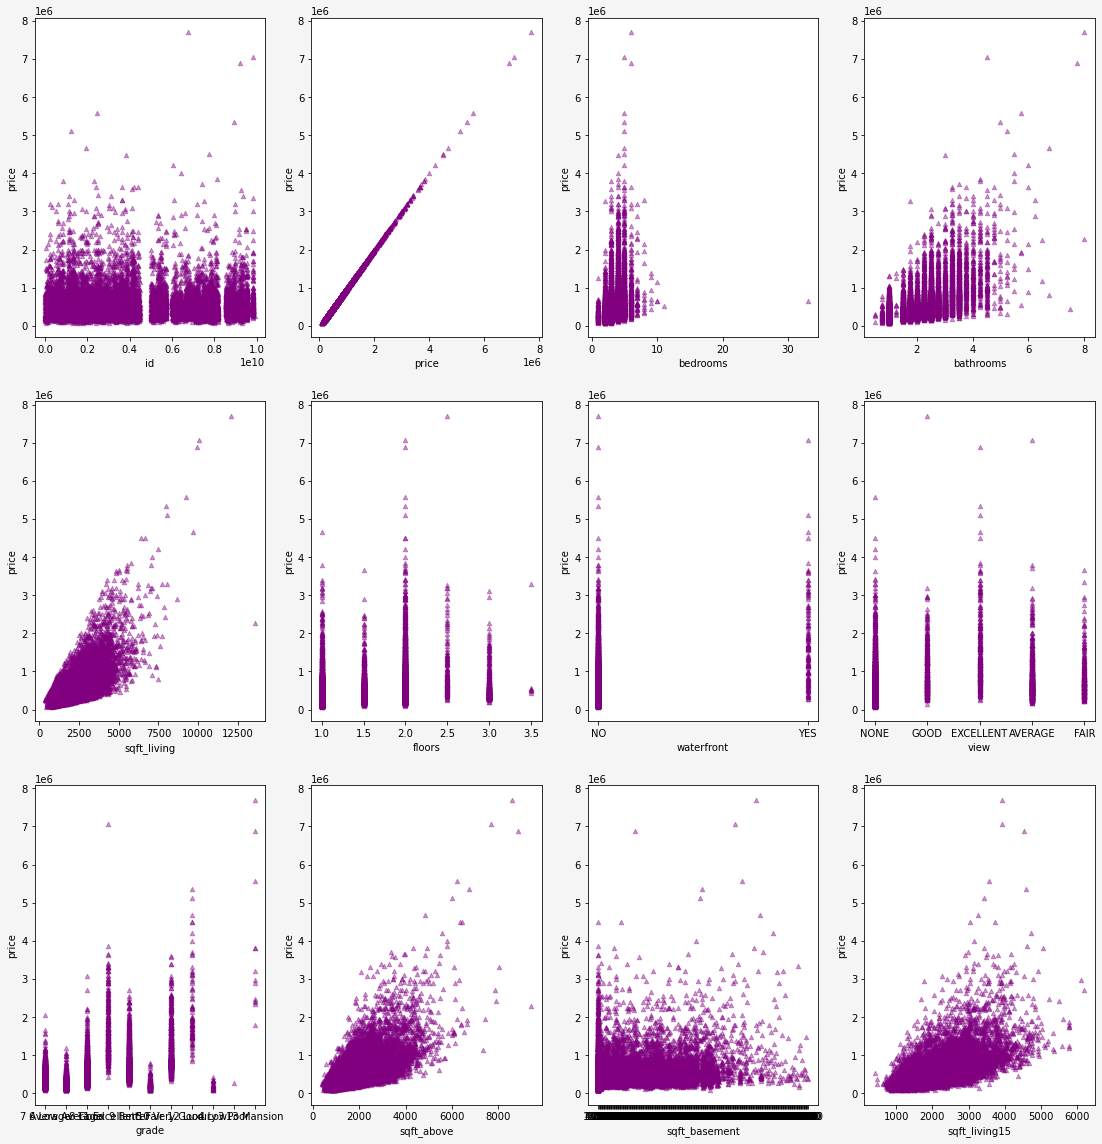

In [82]:
#This code snippet creates a scatter plot matrix for the house data, with each numeric variable plotted against the 'price'.
# creating a list of all column names
plot_list = list(house_data_clean.columns)
len(plot_list)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(19,20))
axes = axes.flatten() # flatten the array to make it easier to iterate over

for i, xcol in enumerate(plot_list[0:19]):
    fig.patch.set_facecolor('whitesmoke')
    house_data_clean.plot(kind='scatter', x=xcol, y='price', ax=axes[i], alpha=0.4, color='Purple', marker='^')
    
plt.show() # add this to display the plot

## e) Modeling

## Simple Linear Model

From our EDA we can see that 'sqft_living' has the highest correlation with price, thus we'll use this as the independent variable for our analysis

In [84]:
# Create variables for our independent and dependent features
X = house_data_clean['sqft_living']
y = house_data_clean['price']

In [85]:
#create a function to create regression models
def regression(X_value, y_value):
    # create the model
    model = sm.OLS(y_value, sm.add_constant(X_value))
    
    #Fit the model
    results = model.fit()

    return results

In [86]:
#call the simple_regression function and store output in results variable
simple_model = regression(X, y)

In [87]:
#create a function for analysing regression results
def regression_analysis(regression_results):
    #Models P_Value
    results_pvalue = regression_results.f_pvalue

    #Model Rsquared
    r_squared = regression_results.rsquared

    #Parameters
    coeffecients = regression_results.params

    return {'Model R-Squared': r_squared,
            'Model P_value': results_pvalue,
            'Coeffecients': coeffecients, 
           }
    

In [88]:
#calling the simple regression analysis function to get summary
regression_analysis(simple_model_results)

{'Model R-Squared': 0.4922247077876325,
 'Model P_value': 0.0,
 'Coeffecients': const         -42152.946806
 sqft_living      279.932115
 dtype: float64}

From the results above we get that:
Our model is statistically significant, with a p-value well below the standard alpha of 0.05

Our model explains about 49.2% of the variance in home price, the dependent variable

For a house with 0 squarefoot of living area, our model would predict a home price of about -42152.94 dollars. 

An increase of 1 square foot in living area  is associated with an increase of about 279.93 dollars in house price.

#### Assumptions of linear regression

Linear regression makes several assumptions about the data, such as :

Linearity of the data. The relationship between the predictor (x) and the outcome (y) is assumed to be linear.

Normality of residuals. The residual errors are assumed to be normally distributed.

Homogeneity of residuals variance. The residuals are assumed to have a constant variance (homoscedasticity)

Independence of residuals error terms.

We'll create a function to check on the assumptions of linear regression

In [89]:
# plotting predicted values vs. residuals
def linearity_check(model):
    model_fitted_y = model.fittedvalues
    model_residuals = model.resid
    fig, ax = plt.subplots(figsize=(12,5), facecolor='#F5F5F5')
    _ = ax.scatter(model_fitted_y, model_residuals, color='#00BFFF')

    # adding horizontal line at y=0
    ax.hlines(y=0, xmin=model_fitted_y.min(), xmax=model_fitted_y.max(), colors='#FF00FF', linestyles='--')
    ax.set_xlabel('Predicted values')
    ax.set_ylabel('Residuals')
    ax.set_title('Linearity Check: Predicted vs. Residuals')
    ax.hlines(y=0, xmin=model_fitted_y.min(), xmax=model_fitted_y.max(), colors='r', linestyles='--')
    ax.set_xlabel('Predicted values')
    ax.set_ylabel('Residuals')
    ax.set_title('Linearity Check: Predicted vs. Residuals')
    plt.show()

# plotting histogram of residuals
def normality_check(residuals):
    # Histogram of residuals
    fig, ax = plt.subplots(figsize=(10,5), facecolor='#F5F5F5')
    sns.histplot(residuals, color='#F7CAC9')
    ax.set_title('Normality Check: Histogram of Residuals')
    ax.set_xlabel('Residuals')
    ax.set_ylabel('Frequency')
    
    # Q-Q plot of residuals
    fig, ax = plt.subplots(figsize=(10,5), facecolor='#F5F5F5')
    sm.qqplot(residuals, fit=True, line='45', ax=ax)
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Sample Quantiles')
    ax.set_title('Normality Check: Q-Q Plot of Residuals')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', which='both', length=0)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.show()
    
# plotting residuals vs. fitted values
def homoscedasticity_check(model):
    model_residuals = model.resid
    model_fitted_y = model.fittedvalues
    fig, ax = plt.subplots(figsize=(12,6), facecolor='#F5F5F5')
    sns.scatterplot(x=model_fitted_y, y=model_residuals, color='#00BFFF', alpha=0.5, ax=ax)

    # add horizontal line at y=0
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')
    ax.set_title('Homoscedasticity Check: Residuals vs. Fitted Values', fontsize=16)
    plt.show()
    
# plotting autocorrelation function of residuals
def independence_check(residuals):
    fig, ax = plt.subplots(figsize=(9,5), facecolor='#F5F5F5')
    _ = sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax)
    ax.set_xlabel('Lags')
    ax.set_ylabel('Autocorrelation')
    ax.set_title('Independence Check: Autocorrelation Function of Residuals')
    plt.show()

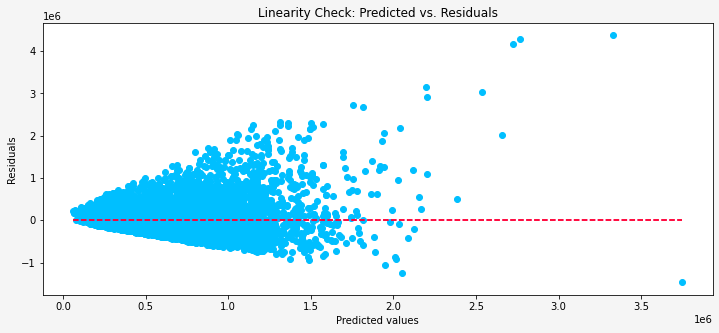

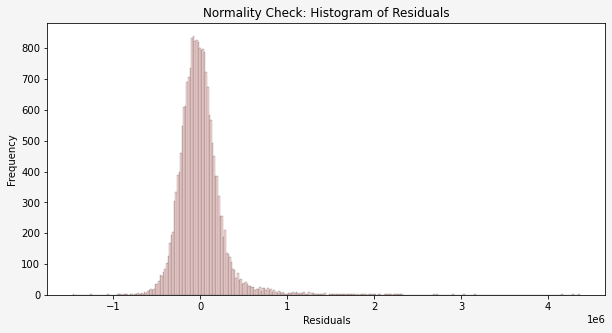

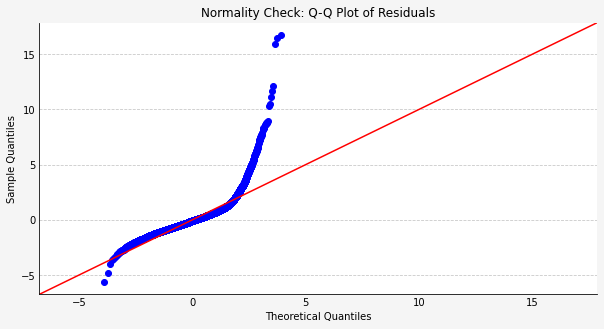

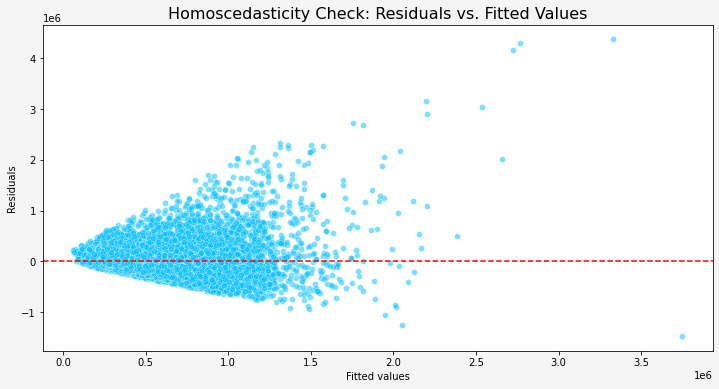

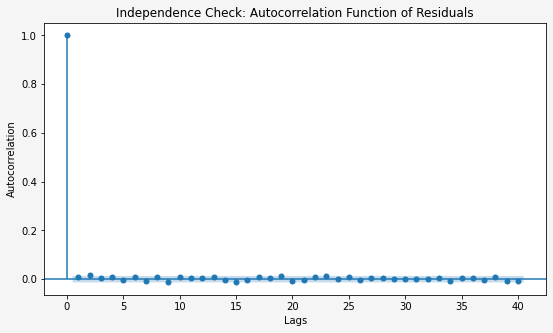

In [90]:
linearity_check(simple_model)
normality_check(simple_model.resid)
homoscedasticity_check(simple_model)
independence_check(simple_model.resid)

#### Shortcomings of the simple linear regression

Simple linear regression assumes that the residuals are normally distributed with constant variance. However, in real-world data, the assumptions of normality and homoscedasticity may be violated, leading to biased estimates and unreliable inference

House prices are influenced by a multitude of factors beyond just square footage. Ignoring these factors in favor of a simple linear model may result in omitted variable bias and inaccurate predictions.

The r-squared value indicates that our simple regression model only explains 43.0% variation in home price and this is not extremely high

## Multilinear Regression
### Identification of categorical variables for prediction


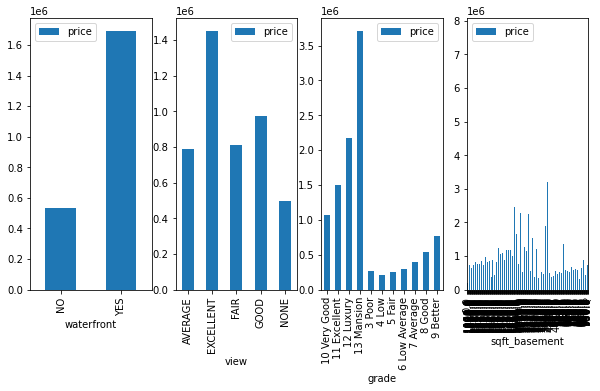

In [91]:
categorical_features = house_data_clean.select_dtypes("object").columns
fig, axes = plt.subplots(ncols=len(categorical_features), figsize=(10,5))

for index, feature in enumerate(categorical_features):
   house_data_clean.groupby(feature).mean().plot.bar(
        y="price", ax=axes[index])

In [92]:
#Create dataframe for multilinera analysis
cat_column= pd.DataFrame(house_data_clean[['sqft_living','bathrooms','grade']])
cat_column


,sqft_living,bathrooms,grade
0,1180,1.00,7 Average
1,2570,2.25,7 Average
2,770,1.00,6 Low Average
3,1960,3.00,7 Average
4,1680,2.00,8 Good
...,...,...,...
21592,1530,2.50,8 Good
21593,2310,2.50,8 Good
21594,1020,0.75,7 Average
21595,1600,2.50,8 Good


### Converting Categorical to Numeric

In [93]:
data_encoded = pd.get_dummies(cat_column, columns=['grade'], drop_first=True)
data_encoded

,sqft_living,bathrooms,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,1180,1.00,0,0,0,0,0,0,0,1,0,0
1,2570,2.25,0,0,0,0,0,0,0,1,0,0
2,770,1.00,0,0,0,0,0,0,1,0,0,0
3,1960,3.00,0,0,0,0,0,0,0,1,0,0
4,1680,2.00,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,2.50,0,0,0,0,0,0,0,0,1,0
21593,2310,2.50,0,0,0,0,0,0,0,0,1,0
21594,1020,0.75,0,0,0,0,0,0,0,1,0,0
21595,1600,2.50,0,0,0,0,0,0,0,0,1,0


In [94]:
# modifying columns
data_encoded.columns =data_encoded.columns.str.replace(' ', '')
data_encoded

,sqft_living,bathrooms,grade_11Excellent,grade_12Luxury,grade_13Mansion,grade_3Poor,grade_4Low,grade_5Fair,grade_6LowAverage,grade_7Average,grade_8Good,grade_9Better
0,1180,1.00,0,0,0,0,0,0,0,1,0,0
1,2570,2.25,0,0,0,0,0,0,0,1,0,0
2,770,1.00,0,0,0,0,0,0,1,0,0,0
3,1960,3.00,0,0,0,0,0,0,0,1,0,0
4,1680,2.00,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,2.50,0,0,0,0,0,0,0,0,1,0
21593,2310,2.50,0,0,0,0,0,0,0,0,1,0
21594,1020,0.75,0,0,0,0,0,0,0,1,0,0
21595,1600,2.50,0,0,0,0,0,0,0,0,1,0


In [95]:
data_encoded

,sqft_living,bathrooms,grade_11Excellent,grade_12Luxury,grade_13Mansion,grade_3Poor,grade_4Low,grade_5Fair,grade_6LowAverage,grade_7Average,grade_8Good,grade_9Better
0,1180,1.00,0,0,0,0,0,0,0,1,0,0
1,2570,2.25,0,0,0,0,0,0,0,1,0,0
2,770,1.00,0,0,0,0,0,0,1,0,0,0
3,1960,3.00,0,0,0,0,0,0,0,1,0,0
4,1680,2.00,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,2.50,0,0,0,0,0,0,0,0,1,0
21593,2310,2.50,0,0,0,0,0,0,0,0,1,0
21594,1020,0.75,0,0,0,0,0,0,0,1,0,0
21595,1600,2.50,0,0,0,0,0,0,0,0,1,0


In [96]:
multi_model = regression(data_encoded,y)

In [97]:
#calling the regression analysis function to get summary
regression_analysis(multi_model)

{'Model R-Squared': 0.5813248224364927,
 'Model P_value': 0.0,
 'Coeffecients': const                5.362104e+05
 sqft_living          1.635520e+02
 bathrooms           -1.314832e+04
 grade_11Excellent    2.881870e+05
 grade_12Luxury       7.911962e+05
 grade_13Mansion      2.017692e+06
 grade_3Poor         -3.493962e+05
 grade_4Low          -4.236142e+05
 grade_5Fair         -4.338690e+05
 grade_6LowAverage   -4.128412e+05
 grade_7Average      -3.858580e+05
 grade_8Good         -3.196276e+05
 grade_9Better       -1.961458e+05
 dtype: float64}

### Model Interpretation

Model R-Squared: The R-squared value (0.5813) indicates the proportion of variance in the target variable (house prices) that is explained by the independent variables (features) in the model. In this case, approximately 58.1% of the variance in house prices is explained by the features included in the model. A higher R-squared value suggests that the model fits the data well.

Model P-value: The p-value (0.0) associated with the overall model indicates the statistical significance of the model. A p-value less than the significance level (e.g., 0.05) suggests that the model is statistically significant, meaning that at least one of the coefficients is significantly different from zero. In this case, the very low p-value indicates that the model is statistically significant.


Coefficients: The coefficients represent the estimated effects of the independent variables (features) on the target variable (house prices), holding other variables constant. Each coefficient indicates the change in the target variable for a one-unit change in the corresponding independent variable, while keeping other variables constant.
 
* Square Footage (sqft_living): For each additional square foot of living space, we expect the house price to increase by approximately $163.55.

* Bathrooms: Each additional bathroom is associated with a decrease in house price of approximately $13,148.32.

* Grade Categories: The coefficients for different grade categories indicate how each grade level affects house prices compared to the reference grade category (assuming one of the categories is chosen as the reference). For example:

Houses classified as "Grade 11 Excellent" have an average price that is approximately $288,187 higher compared to the reference category.

Houses classified as "Grade 12 Luxury" have an average price that is approximately $791,196 higher compared to the reference category.

Similarly, "Grade 13 Mansion" houses have the highest average price increase compared to the reference category, approximately $2,017,692.

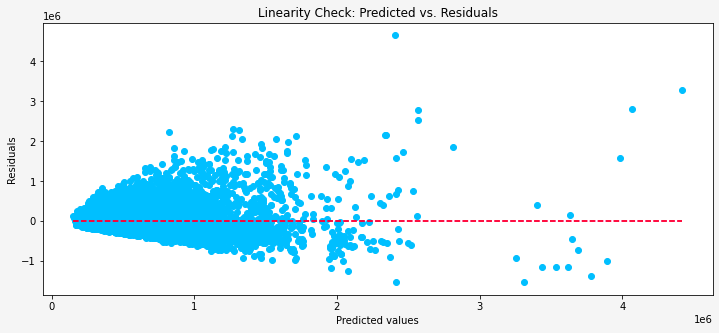

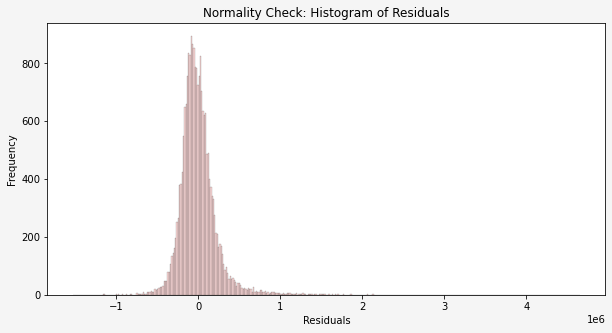

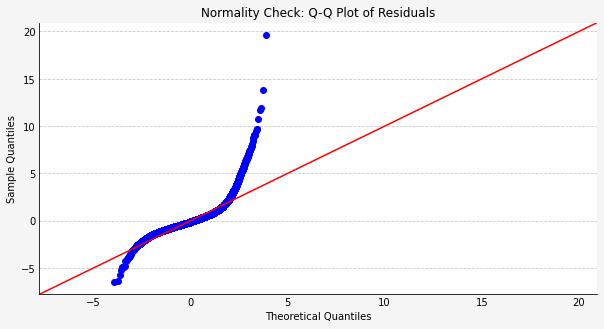

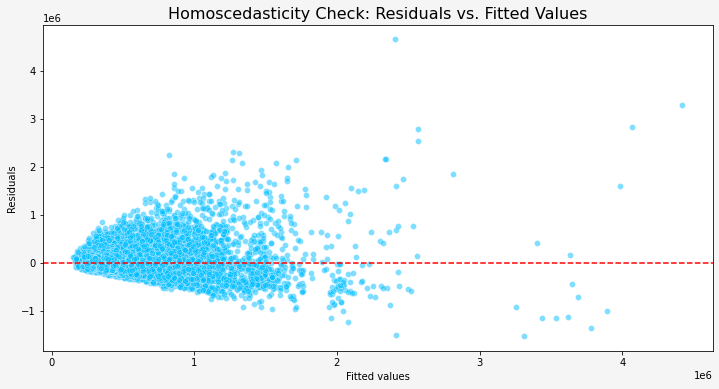

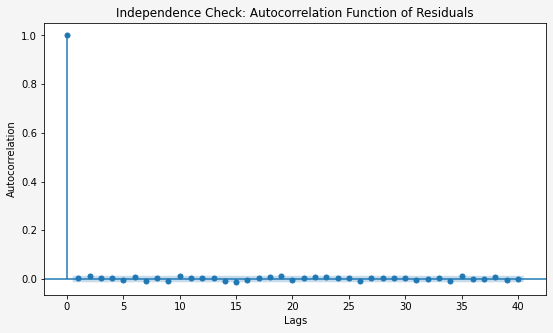

In [98]:
#Check on the linear regression assumptions
linearity_check(multi_model)
normality_check(multi_model.resid)
homoscedasticity_check(multi_model)
independence_check(multi_model.resid)

### Train Test split

The dataset is split into training and testing sets. This is in prepartion of Fitting the model on the training data and evaluating its performance on the separate testing data. This allows you to assess how well the model generalizes to new, unseen data.

The X parameter represents the features (independent variables), while y represents the target variable (dependent variable).

30% of the data is used for testing and 70% is used for training whle random_state is specified to ensure reproducibility of the split.


In [99]:
# Define a function named "train_test" that takes two input parameters, x and y.
def train_test(x,y):
    
    # Split the input data into training and testing sets using the "train_test_split" method from scikit-learn.
    # Use a test size of 0.3 and a random state of 42.
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    
    # Create a LinearRegression object and train it using the training data.
    linreg = LinearRegression()
    linreg.fit(x_train, y_train)
    
    # Make predictions using the trained model for both the training and testing data.
    y_hat_train = linreg.predict(x_train)  # these are our prediction values
    y_hat_test = linreg.predict(x_test)
    
    # Print the R-squared value for the testing data.
    print('the r2_score:', r2_score(y_test, y_hat_test), '\n')
    
    # Calculate the mean absolute error and mean squared error for both the training and testing data.
    train_mae = mean_absolute_error(y_train, y_hat_train)
    test_mae = mean_absolute_error(y_test, y_hat_test)
    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)
    
    # Print the mean absolute error and mean squared error for both the training and testing data.
    print('train MAE:', train_mae)
    print('test MAE:', test_mae, '\n')
    print('train MSE:', train_mse)
    print('test MSE:', test_mse, '\n')
    
    # Print the root mean squared error for both the training and testing data.
    print('train root Mean squared Error: ', train_mse** 0.5)
    print('test root Mean squared Error: ', test_mse** 0.5, '\n')
    
    # Create a scatter plot comparing the predicted values to the actual values for both the training and testing data.
    plt.figure(figsize=(10, 6))

    plt.scatter(y_train, y_hat_train, alpha=0.5, color='#00BFFF', label='train')
    sns.regplot(x=y_train, y=y_hat_train, scatter=False, color='r', label='train fit')

    plt.scatter(y_test, y_hat_test, alpha=0.5, color='#FFC0CB', label='test')
    sns.regplot(x=y_test, y=y_hat_test, scatter=False, color='g', label='test fit')

    plt.scatter(x=y, y=y, color='maroon', alpha=0.3, label='actual')

    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual Price vs Predicted Price')

    plt.legend()
    plt.grid()
    plt.show()
    
    # Create a new LinearRegression object and train it using the training data.
    ml =LinearRegression()
    ml.fit(x_train,y_train)
    
    # Use the new model to make predictions for the testing data.
    y_pred = ml.predict(x_test)
    
    # Create a DataFrame containing the actual values, predicted values, difference, and percentage difference for the testing data.
    pred_y_df = pd.DataFrame({'Actual Values': y_test, 'Predicted Value' : y_pred, 'Difference' :abs(y_test-y_pred) , 'Percentage Difference' : abs((y_test-y_pred)/y_test*100)})
    
    # Calculate the mean percentage difference between the actual and predicted values for the testing data.
    mean_percentage = pred_y_df['Percentage Difference'].mean()
    
    # Print the mean percentage difference for the testing data.
    print('mean_diff:', mean_percentage)

    return pred_y_df[0:5]

After spliting the dataset, the function creates a LinearRegression object called linreg and trains it using the training data (x_train and y_train). It then uses the trained model to make predictions for both the training and testing data.
Model Evaluation:
The code calculates and prints various evaluation metrics such as R-squared, mean absolute error (MAE), mean squared error (MSE), root mean squared error (RMSE), and mean percentage difference.
After which it creates a Scatter Plot. The code creates a scatter plot comparing the predicted values to the actual values for both the training and testing data. It also includes a regression line for each set of data points.
The function returns a DataFrame containing the actual values, predicted values, difference, and percentage difference for the testing data. It only returns the first 5 rows of the DataFrame.



the r2_score: 0.5980050367147236 

train MAE: 157224.75648605684
test MAE: 154049.35433216894 

train MSE: 56949635252.11967
test MSE: 55127063551.63158 

train root Mean squared Error:  238641.2270587789
test root Mean squared Error:  234791.5321122795 



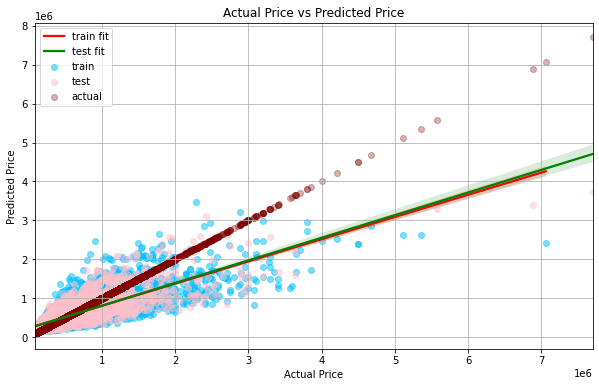

mean_diff: 31.74511801625908


In [100]:
x = data_encoded
y = house_data_clean['price']
train_model = train_test(x,y)

The R-squared value (r2_score) is a measure of how well the model fits the data, with values closer to 1 indicating a better fit. In this case, r2 score is 0.5980 which suggests that the model explains 59.8% of the variability in the target variable.

The mean absolute error (MAE) is a measure of the average magnitude of errors in the predictions made by the model. The lower the MAE, the better the model. The train MAE and test MAE are 156674.07834 and 154037.816273 respectively, which are quite large values, indicating that the model is not performing well.

The root mean squared error (RMSE) is the square root of the MSE, and it measures the average magnitude of the error in the model's predictions. The train RMSE and test RMSE are 237906.0435 and 234825.1832 respectively, which are also quite large.


Overall, these metrics suggest that the linear regression model is not performing very well in making accurate predictions on the dataset.

## Linear Transformation

#### Log Transformation Model

Below is a histogram showing the data distribution in the price column used in modelling before transformation.

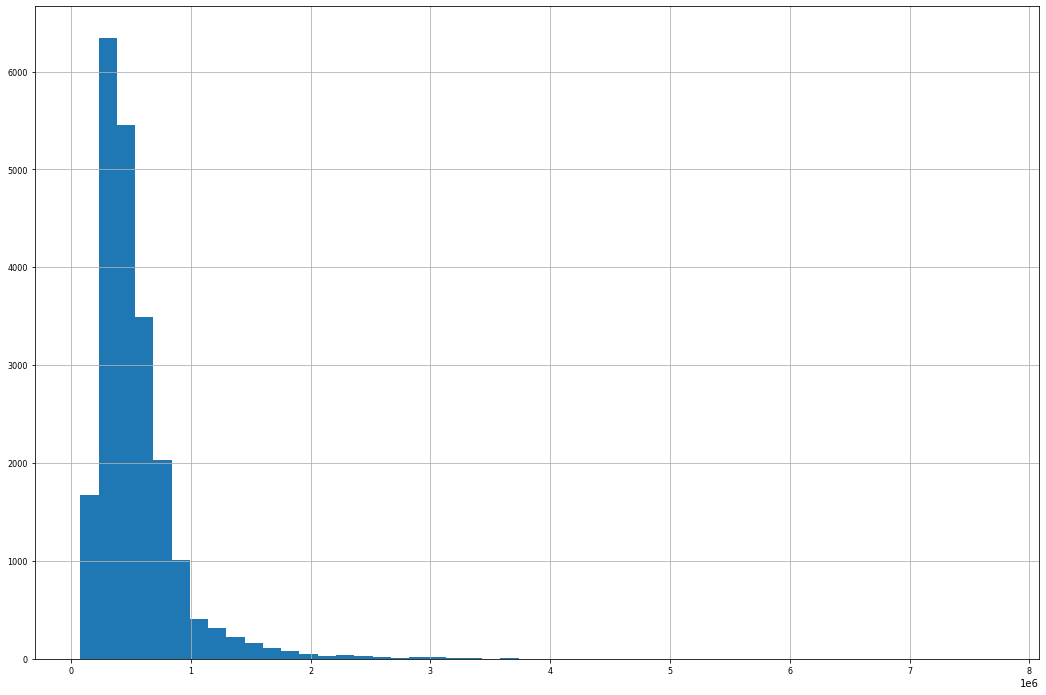

In [102]:
# Plotting histograms of all the variables
house_data_clean['price'].hist(figsize=(18,12), bins=50, xlabelsize=8, ylabelsize=8);

 The price distribution is right-skwed. A logarithmic transformation is used on the values in the 'price' column of the DataFrame, which can be useful for data preprocessing when dealing with skewed distributions or to linearize relationships between variables in certain statistical analyses.

In [103]:
y_log = np.log(y)
y_log.name = "log(price)"
y_log

0        12.309982
1        13.195614
2        12.100712
3        13.311329
4        13.142166
           ...    
21592    12.793859
21593    12.899220
21594    12.904459
21595    12.899220
21596    12.691580
Name: log(price), Length: 21534, dtype: float64

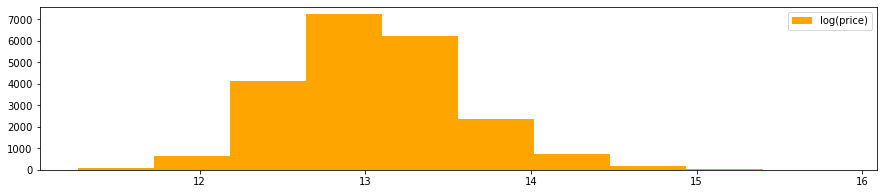

In [104]:
# Plot distributions of raw vs. transformed values

fig, ax = plt.subplots(figsize=(15,3))
ax.hist(y_log, color="orange", label="log(price)")
ax.legend();

As shown above, the distribution after standardization is normally distributed.

the r2_score: 0.5678322679477039 

train MAE: 0.28280161254380465
test MAE: 0.28163805509634804 

train MSE: 0.12361270751410015
test MSE: 0.12198351293490667 

train root Mean squared Error:  0.35158598879093594
test root Mean squared Error:  0.3492613819690157 



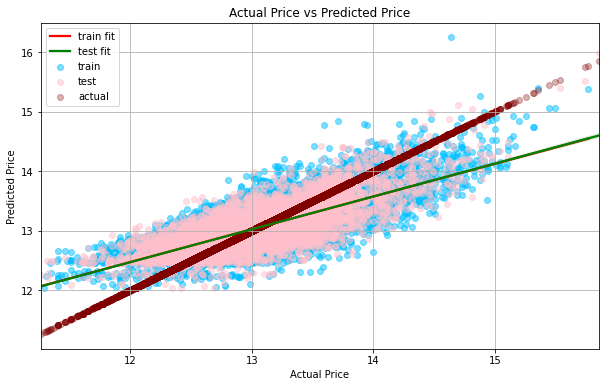

mean_diff: 2.1650355683802527


,Actual Values,Predicted Value,Difference,Percentage Difference
19009,13.815511,13.151063,0.664448,4.809432
6370,13.676248,13.801158,0.124909,0.913331
13983,11.982929,12.536251,0.553321,4.617581
7837,14.316286,13.522410,0.793876,5.545262
9491,12.814479,13.079173,0.264695,2.065590


In [105]:
#Log transformation model

train_test(data_encoded,y_log)

An R2 score of 0.568 indicates that the model explains 56.8% of the variance in the logarithmic actual values.
An MAE value of 0.282 for train data and 0.284 for test data suggest that, on average, the model's logarithmic predictions are off by about 28.2% and 28.4% respectively from the logarithmic actual values.
An MSE value of 0.1228 for train data and an MSE of 0.1256 for test data suggest that, on average, the model's logarithmic predictions are off by the squared value of about 12.28% and 12.56% respectively from the logarithmic actual values.
An RMSE value of 0.3504 for train data and 0.3544 for test data suggest that, on average, the model's logarithmic predictions are off by the squared root value of about 35.04% and 35.44% respectively from the logarithmic actual values

In [106]:
#fitting the model
log_model = regression(data_encoded,y_log)

### Checking for assumptions.

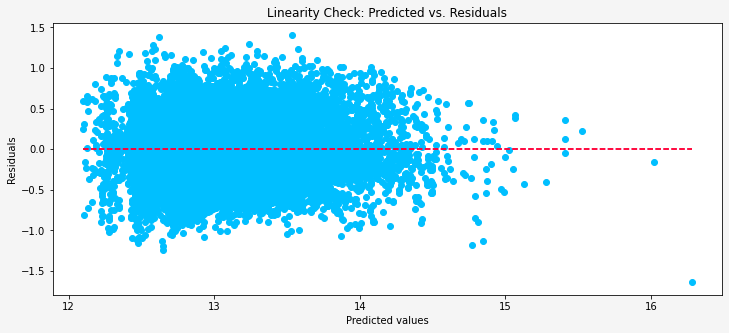

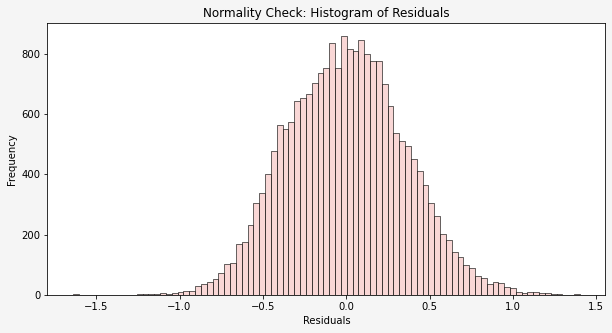

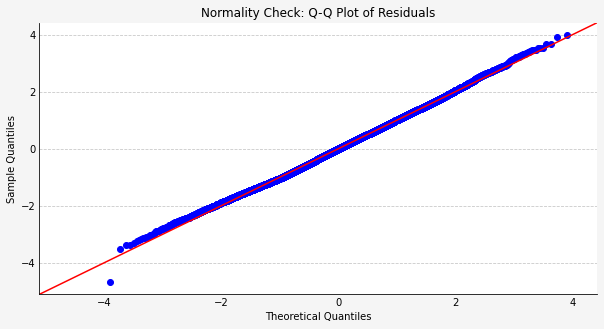

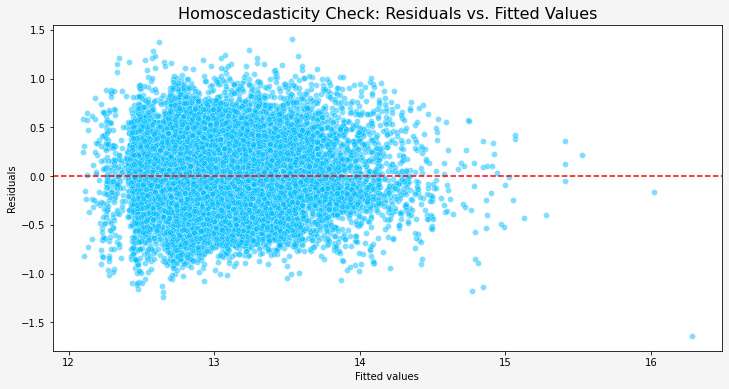

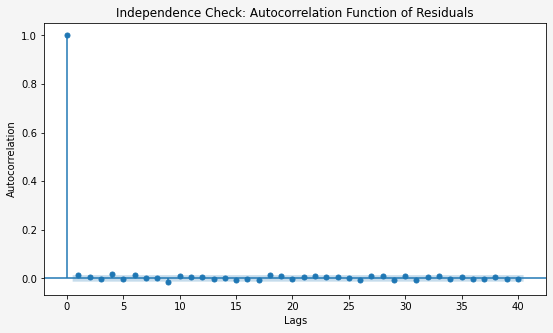

In [107]:
#Check on the linear regression assumptions
linearity_check(log_model)
normality_check(log_model.resid)
homoscedasticity_check(log_model)
independence_check(log_model.resid)

* from the visualization our model is not linearly distributed
* graphs suggest that the residuals here are normally distributed compared to the base model, this is an improvement compared to the base model
* The scatter plot of the residuals against the fitted show a random pattern of points that are roughly evenly distributed around the horizontal line, this passes the Homoscedasticity of linearity assumption
* Their is a temporary difference in the residuals


### Second Iteration: Train Test Split

In [116]:
# Define a function named "train_test" that takes two input parameters, x and y.
def train_test(x,y):
    
    # Split the input data into training and testing sets using the "train_test_split" method from scikit-learn.
    # Use a test size of 0.2 and a random state of 42.
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    # Create a LinearRegression object and train it using the training data.
    linreg = LinearRegression()
    linreg.fit(x_train, y_train)
    
    # Make predictions using the trained model for both the training and testing data.
    y_hat_train = linreg.predict(x_train)  # these are our prediction values
    y_hat_test = linreg.predict(x_test)
    
    # Print the R-squared value for the testing data.
    print('the r2_score:', r2_score(y_test, y_hat_test), '\n')
    
    # Calculate the mean absolute error and mean squared error for both the training and testing data.
    train_mae = mean_absolute_error(y_train, y_hat_train)
    test_mae = mean_absolute_error(y_test, y_hat_test)
    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)
    
    # Print the mean absolute error and mean squared error for both the training and testing data.
    print('train MAE:', train_mae)
    print('test MAE:', test_mae, '\n')
    print('train MSE:', train_mse)
    print('test MSE:', test_mse, '\n')
    
    # Print the root mean squared error for both the training and testing data.
    print('train root Mean squared Error: ', train_mse** 0.5)
    print('test root Mean squared Error: ', test_mse** 0.5, '\n')
    
    # Create a scatter plot comparing the predicted values to the actual values for both the training and testing data.
    plt.figure(figsize=(10, 6))

    plt.scatter(y_train, y_hat_train, alpha=0.5, color='#00BFFF', label='train')
    sns.regplot(x=y_train, y=y_hat_train, scatter=False, color='r', label='train fit')

    plt.scatter(y_test, y_hat_test, alpha=0.5, color='#FFC0CB', label='test')
    sns.regplot(x=y_test, y=y_hat_test, scatter=False, color='g', label='test fit')

    plt.scatter(x=y, y=y, color='maroon', alpha=0.3, label='actual')

    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual Price vs Predicted Price')

    plt.legend()
    plt.grid()
    plt.show()
    
    # Create a new LinearRegression object and train it using the training data.
    ml =LinearRegression()
    ml.fit(x_train,y_train)
    
    # Use the new model to make predictions for the testing data.
    y_pred = ml.predict(x_test)
    
    # Create a DataFrame containing the actual values, predicted values, difference, and percentage difference for the testing data.
    pred_y_df = pd.DataFrame({'Actual Values': y_test, 'Predicted Value' : y_pred, 'Difference' :abs(y_test-y_pred) , 'Percentage Difference' : abs((y_test-y_pred)/y_test*100)})
    
    # Calculate the mean percentage difference between the actual and predicted values for the testing data.
    mean_percentage = pred_y_df['Percentage Difference'].mean()
    
    # Print the mean percentage difference for the testing data.
    print('mean_diff:', mean_percentage)

    return pred_y_df[0:5]

the r2_score: 0.6129404722420997 

train MAE: 156518.3687715074
test MAE: 153974.33689483063 

train MSE: 56174808360.67146
test MSE: 57279747602.43865 

train root Mean squared Error:  237012.2536086931
test root Mean squared Error:  239331.87753084346 



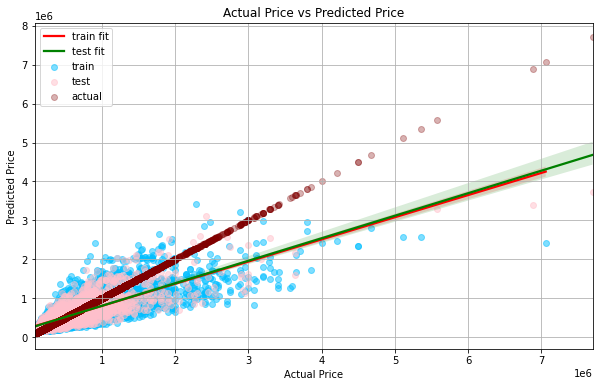

mean_diff: 31.05525372721637


,Actual Values,Predicted Value,Difference,Percentage Difference
19009,1000000.0,6.288417e+05,371158.310917,37.115831
6370,870000.0,1.069435e+06,199435.245525,22.923591
13983,160000.0,2.889850e+05,128985.007480,80.615630
7837,1650000.0,8.212063e+05,828793.669304,50.229919
9491,367500.0,5.023588e+05,134858.836847,36.696282


In [118]:
x = data_encoded
y = house_data_clean['price']
train_test(x,y)

R_squared has improved after changing the test size to 20 %

Our model explains 61.3% variability in home price

### Model Evaluation

Among the evaluated models, the second trained model outperformed others with an R-squared value of 0.6129 on the test data, indicating strong predictive capability. The multiple linear regression model also showed good performance with an R-squared of 0.5813. However, the simple linear and log models had lower R-squared values, suggesting weaker explanatory power.

Overall, the second trained model emerged as the most reliable for predicting the dependent variable.

### Conclusions

* The square footage of the living area is one of the consistent numeric variables

* The parameters R squared increases from one model to another, to indicate that the more predictor variables are used the more refined the model

* Properties in sought-after areas, like waterfront or downtown areas, are limited and highly prized

### Recommendations

* Highlight properties with higher grades to appeal to luxury buyers seeking premium features and amenities.

* Emphasize spacious interiors and versatile floor plans to attract buyers looking for ample living space for their needs.

* Capitalize on properties with desirable views by showcasing them prominently in marketing materials and virtual tours.